In [ ]:
#! pip install keras
#! pip install tensorflow
#!pip install -i https://pypi.anaconda.org/hahaaenois/simple emnist

In [71]:
import keras
import tensorflow
from tensorflow.keras import layers

from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop, SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

import numpy as np
import matplotlib.pyplot as plt

In [244]:

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 100
BATCH_SIZE = 256
VERBOSE = 2
NB_CLASSES = 47   # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explainedin this chapter
N_HIDDEN = 512
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.20

print(list_datasets())
X_train, y_train = extract_training_samples('balanced')
print("train shape: ", X_train.shape)
print("train labels: ",y_train.shape)
X_test, y_test = extract_test_samples('balanced')
print("test shape: ",X_test.shape)
print("test labels: ",y_test.shape)

#for indexing from 0
#y_train = y_train-1
#y_test = y_test-1

#X_train is 124800 rows of 28x28 values --> reshaped in 124800 x 784
#X_train is 20800 rows of 28x28 values --> reshaped in 20800 x 784
RESHAPED = X_train.shape[1]*X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_test = X_test.reshape(X_test.shape[0], RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

# Crear un diccionario que mapea índices a etiquetas para cuando invirtamos el proceso 
# (las salidas van de 0 a 46, pero queremos saber que etiqueta corresponde a cada salida)
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
          'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
          'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']

index_to_label = {i: label for i, label in enumerate(LABELS)}



['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
train shape:  (112800, 28, 28)
train labels:  (112800,)
test shape:  (18800, 28, 28)
test labels:  (18800,)
112800 train samples
18800 test samples


In [117]:
# Esto es el modelo
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()



model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)              

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


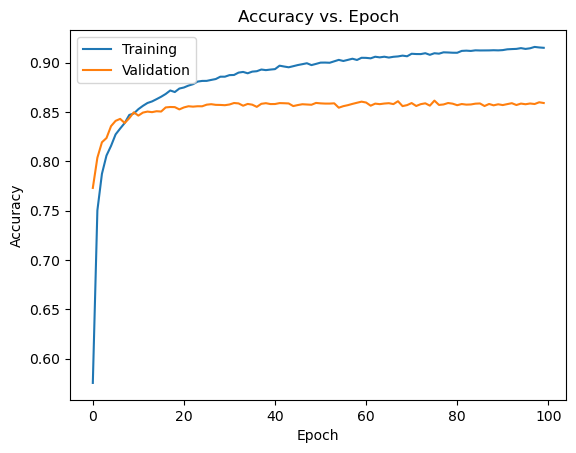

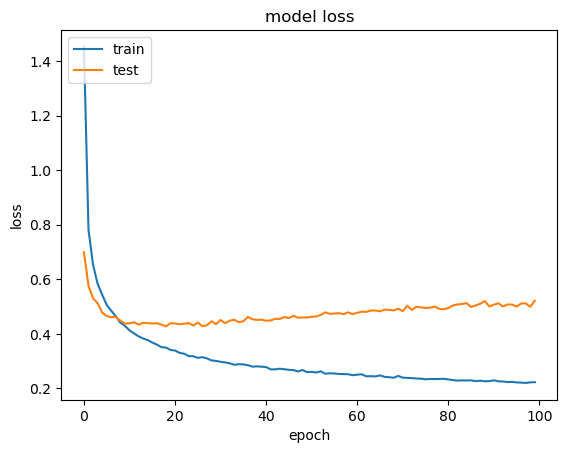

588/588 - 1s - loss: 0.5384 - accuracy: 0.8572 - 646ms/epoch - 1ms/step

Test score: 0.5384182333946228
Test accuracy: 0.8572340607643127


In [119]:

# list all data in history
print(history.history.keys())


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Evaluación del modelo
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [120]:
#model.save('modelos/modelo_C_02.keras')

1/1 [==============================] - 0s 14ms/step


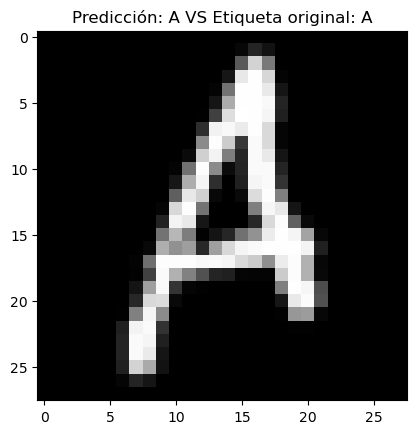

In [243]:

# Seleccionar una muestra aleatoria del conjunto de prueba para probar la red
index = np.random.randint(0, len(X_test))
# Reshape para que sea una fila (para poder representar)
sample = X_test[index].reshape(1, -1)  

# Realizar la predicción usando el modelo cargado (llamado model)
prediction = model.predict(sample)

# Decodificar la predicción para obtener la clase predicha (da un valor entre 1 y 47)
predicted_class = np.argmax(prediction)


plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
predicted_label = index_to_label[predicted_class]           # Obtener etiqueta predicha
true_label =      index_to_label[np.argmax(Y_test[index])]  # Obtener etiqueta verdadera
titulo = f'Predicción: {predicted_label} VS Etiqueta verdadera: {true_label}'
plt.title(titulo)
plt.show()



In [254]:
loaded_model_02 = tensorflow.keras.models.load_model('modelos/modelo_C_02.keras')

1/1 [==============================] - 0s 13ms/step


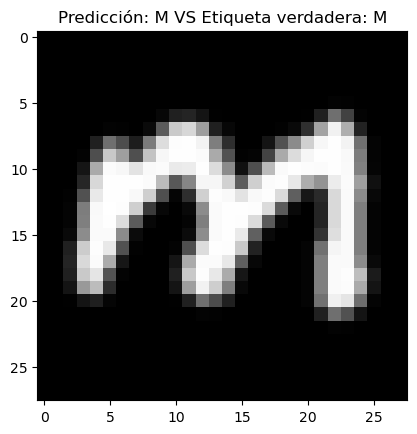

In [260]:

# Seleccionar una muestra aleatoria del conjunto de prueba para probar la red
index = np.random.randint(0, len(X_test))
# Reshape para que sea una fila (para poder representar)
sample = X_test[index].reshape(1, -1)  

# Realizar la predicción usando el modelo cargado (llamado model)
prediction = loaded_model_02.predict(sample)

# Decodificar la predicción para obtener la clase predicha (da un valor entre 1 y 47)
predicted_class = np.argmax(prediction)


plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
predicted_label = index_to_label[predicted_class]           # Obtener etiqueta predicha
true_label =      index_to_label[np.argmax(Y_test[index])]  # Obtener etiqueta verdadera
titulo = f'Predicción: {predicted_label} VS Etiqueta verdadera: {true_label}'
plt.title(titulo)
plt.show()